# Spam email detection

In [1]:
#importing required libaries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
#import the dataset
data=pd.read_csv("spam_data.csv")

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')
data.head(5)

There are 5572 rows and 2 columns


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()
cat_cols  = data.select_dtypes(['object']).columns
int_cols  = data.select_dtypes(['int64']).columns
float_cols = data.select_dtypes(['float']).columns
print(cat_cols)
print(int_cols)
print(float_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Index(['Category', 'Message'], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [7]:
import numpy as np 
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Category', 'Message'], dtype='object')
Numerical Variables:
[]


In [8]:
for col in data.columns:
    print(col, data[col].nunique())

Category 2
Message 5157


In [9]:
#Checking duplicate line
duplicate = data.duplicated().any()
duplicate

True

In [10]:
# Drop duplicates
data_no_duplicates = data.drop_duplicates()

# Display results
print(f"Were there duplicates? {duplicate}")
print("Data without duplicates:")
print(data_no_duplicates)

Were there duplicates? True
Data without duplicates:
     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]


In [12]:
#Checking duplicate line
data_no_duplicates = data.duplicated().any()
data_no_duplicates

True

total spam and ham in the dataset


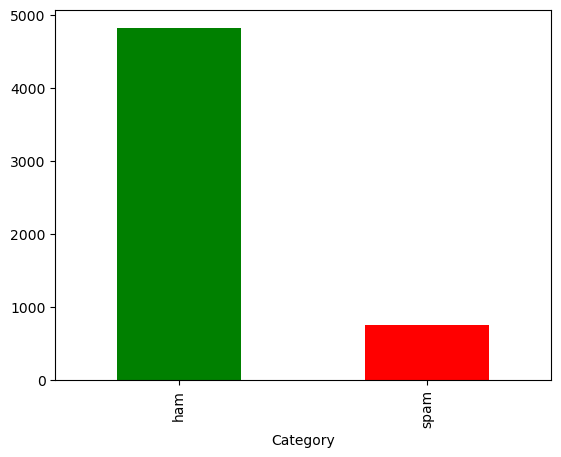

In [13]:
data['Category'].value_counts().plot.bar(color=['g','r'])
print("total spam and ham in the dataset")
plt.show()

In [14]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
data.shape

(5572, 2)

In [16]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [17]:
# text preprocessing- remove the puncuation and convert the letters to lowercase and removes the words that do not contribute much for building the model which are stopwords
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def text_preprocessing(text):
    text=text.translate(str.maketrans('','',string.punctuation))
    text=[i.lower() for i in text.split() if i.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
msg_copy=data.Message.copy()
msg_copy=msg_copy.apply(text_preprocessing)
msg_copy

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [19]:
vectorizer=CountVectorizer()
# now to convert the text to matrix we use fit_transform method
msg_matrix=vectorizer.fit_transform(msg_copy)
print(msg_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
x_train,x_test,y_train,y_test=train_test_split(msg_matrix,data['Category'],random_state=2,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3900, 9433)
(3900,)
(1672, 9433)
(1672,)


In [21]:
from sklearn.linear_model import LogisticRegression

logistic_reg=LogisticRegression(solver='liblinear',penalty='l1')
logistic_reg.fit(x_train,y_train)
lrprediction=logistic_reg.predict(x_test)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
from sklearn.naive_bayes import MultinomialNB

nbclassifier=MultinomialNB()
nbclassifier.fit(x_train,y_train)
nbprediction=nbclassifier.predict(x_test)

Performance of logistic regression:

classification report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1445
        spam       0.95      0.80      0.87       227

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.92      1672
weighted avg       0.97      0.97      0.97      1672


confuion matrix:
 [[1435   10]
 [  45  182]]

Accuracy score: 0.9671052631578947


Heatmap on prediction:



<Axes: >

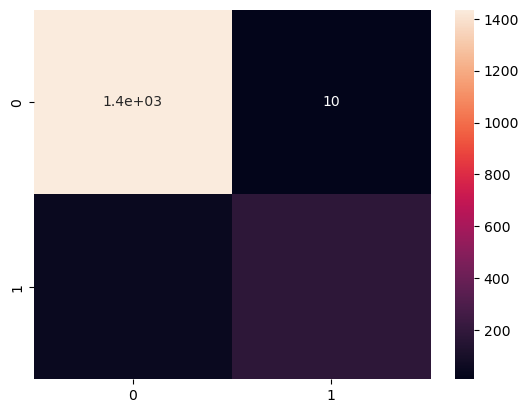

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

# performance of logisctic regression
print("Performance of logistic regression:")
print()
print('classification report:\n',classification_report(y_test,lrprediction))
print()
print("confuion matrix:\n",confusion_matrix(y_test,lrprediction))
print()
print("Accuracy score:",accuracy_score(y_test,lrprediction))
print("\n\nHeatmap on prediction:\n")
sns.heatmap(confusion_matrix(y_test,lrprediction),annot=True)

Performance of Naive bayes:

classification report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1445
        spam       0.89      0.91      0.90       227

    accuracy                           0.97      1672
   macro avg       0.94      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672


confuion matrix:
 [[1420   25]
 [  20  207]]

Accuracy score: 0.9730861244019139


Heatmap on prediction:



<Axes: >

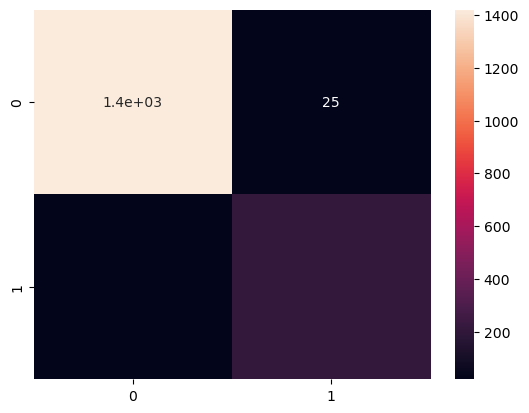

In [24]:
# performance of Naive bayes 
print("Performance of Naive bayes:")
print()
print('classification report:\n',classification_report(y_test,nbprediction))
print()
print("confuion matrix:\n",confusion_matrix(y_test,nbprediction))
print()
print("Accuracy score:",accuracy_score(y_test,nbprediction))
print("\n\nHeatmap on prediction:\n")
sns.heatmap(confusion_matrix(y_test,nbprediction),annot=True)